<a href="https://colab.research.google.com/github/Ronnie47/Statistic_Notes/blob/main/Lecture_02_Bivariate_NUM_NUM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Bivariate Analysis

we are doing this for Numeric vs Numeric variables

In [4]:
# pearson and spearman correlation

height = [60, 62, 65, 68, 70, 74]
weight = [140, 138, 150, 166, 190, 250]

In [5]:
np.corrcoef(height, weight)

array([[1.        , 0.92989745],
       [0.92989745, 1.        ]])

In [8]:
df = pd.read_csv('http://www.ishelp.info/data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
df.select_dtypes(exclude = 'object').corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [13]:
df.charges.corr(df.bmi)

0.19834096883362895

In [15]:
from scipy.stats import pearsonr

corr = pearsonr(df.charges, df.age)
print(corr)

PearsonRResult(statistic=0.2990081933306476, pvalue=4.886693331718192e-29)


In [16]:
corr_df = pd.DataFrame(columns = ['r', 'p'])
for col in df.select_dtypes(exclude = 'object').columns:
    corr_stats, p_value = pearsonr(df.charges, df[col])
    corr_df.loc[col] = [corr_stats, p_value]
corr_df

,r,p
age,0.299008,4.886693e-29
bmi,0.198341,2.459086e-13
children,0.067998,1.285213e-02
charges,1.000000,0.000000e+00


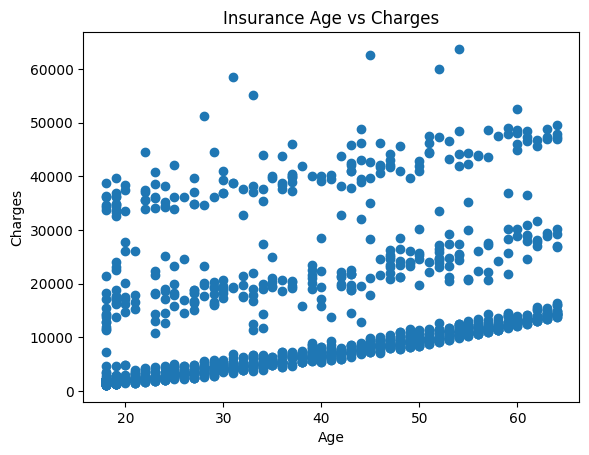

In [19]:
plt.scatter(df.age, df.charges)
plt.title('Insurance Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

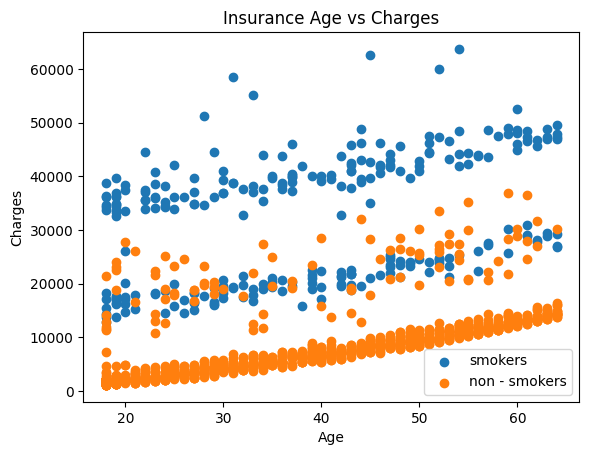

In [22]:
df_smoke = df[df['smoker'] == 'yes']
df_nonsmoke = df[df['smoker'] == 'no']

plt.scatter(df_smoke.age, df_smoke.charges, label = 'smokers')
plt.scatter(df_nonsmoke.age, df_nonsmoke.charges, label = 'non - smokers')
plt.title('Insurance Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

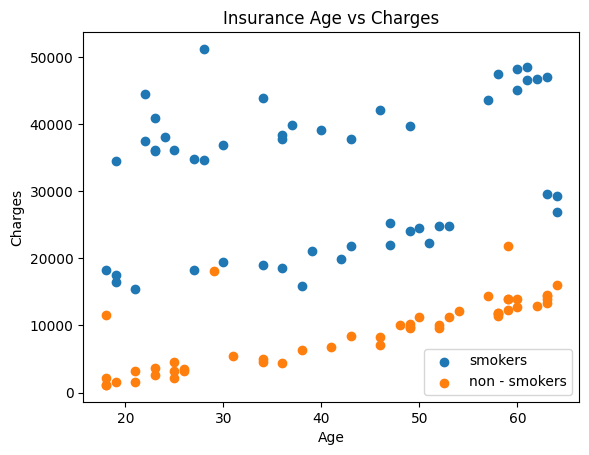

In [23]:
df_smoke_reduced = df_smoke.sample(50)
df_nonsmoke_reduced = df_nonsmoke.sample(50)

plt.scatter(df_smoke_reduced.age, df_smoke_reduced.charges, label = 'smokers')
plt.scatter(df_nonsmoke_reduced.age, df_nonsmoke_reduced.charges, label = 'non - smokers')
plt.title('Insurance Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

In [26]:
from scipy import stats

print(stats.linregress(df.age, df.charges))

LinregressResult(slope=257.7226186668954, intercept=3165.8850060630302, rvalue=0.2990081933306476, pvalue=4.886693331718841e-29, stderr=22.502389286770295, intercept_stderr=937.1494650703766)


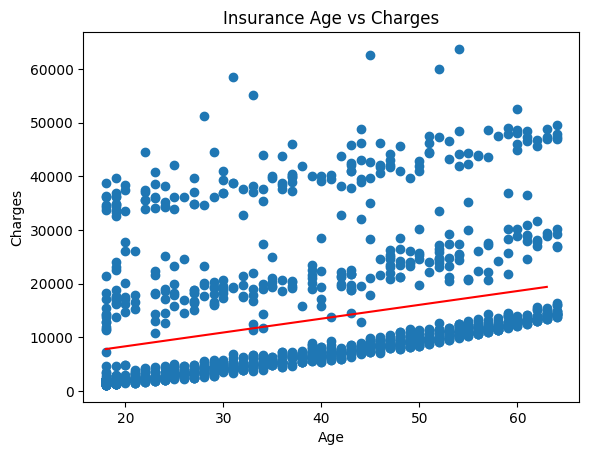

In [35]:
m, b, r, p, err = stats.linregress(df.age, df.charges)

x = range(18, df.age.max())
y = m * x + b

plt.scatter(df.age, df.charges)
plt.plot(x, y, color = 'red')
plt.title('Insurance Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

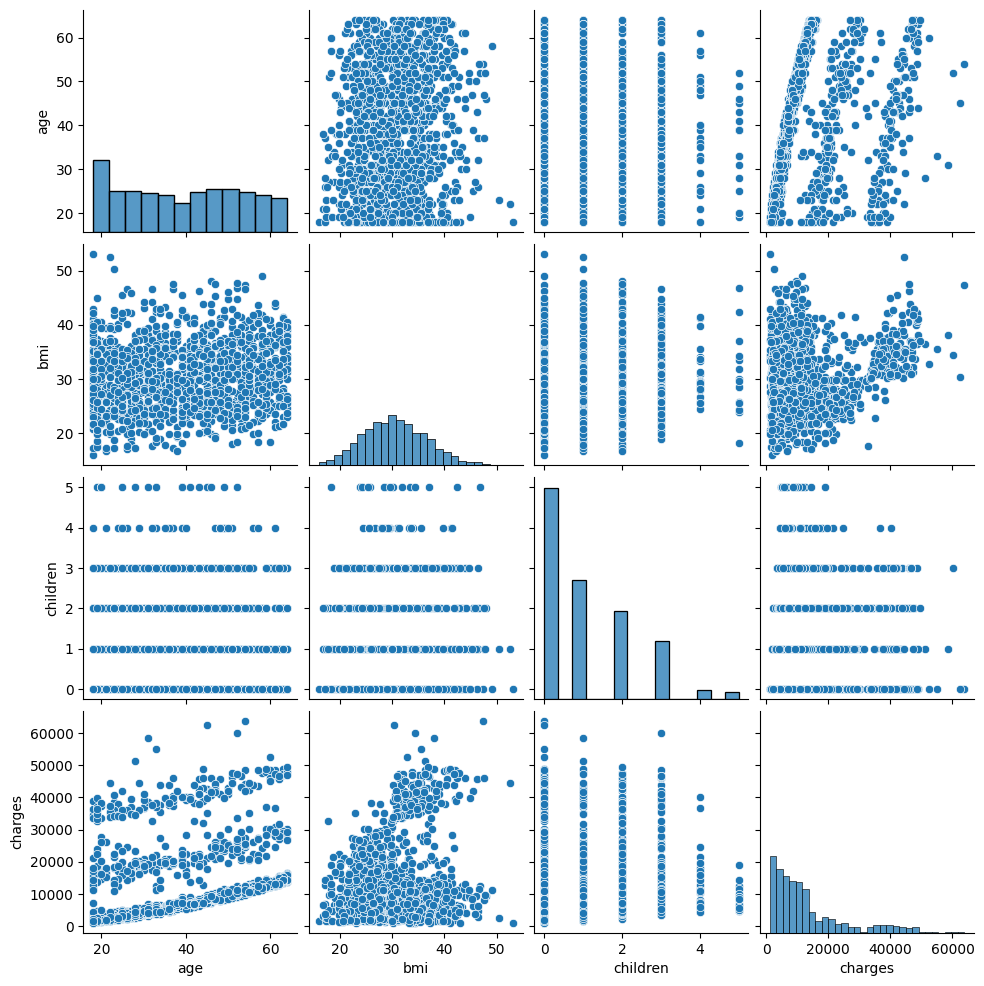

In [36]:
sns.pairplot(df)

In [39]:
import plotly.express as px

fig = px.scatter_3d(df, x = 'age', y = 'charges', z = 'bmi', color = 'smoker')
fig.show()